In [3]:
print("Lets take three companies that already collapsed: (SVB Financial) (Yes Bank)	(Evergrande) ")

Lets take three companies that already collapsed: (SVB Financial) (Yes Bank)	(Evergrande) 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_yesbank = pd.read_csv("../data/historic_yesbank.csv", parse_dates=["Date"])
df_svb = pd.read_csv("../data/historic_svb.csv", parse_dates=["Date"])
df_evergrande = pd.read_csv("../data/historic_evergrande.csv", parse_dates=["Date"])


In [3]:
df_all = pd.concat([df_yesbank, df_svb, df_evergrande])
df_all.sort_values(by="Date", inplace=True)


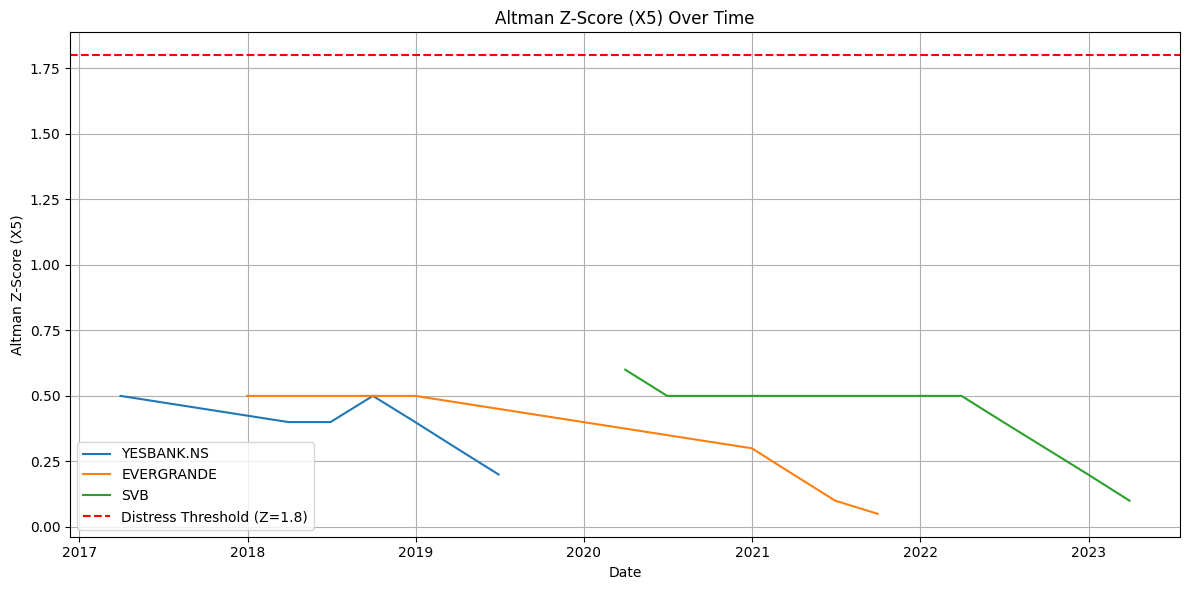

In [4]:
import os
os.makedirs("./plots", exist_ok=True)


plt.figure(figsize=(12, 6))

for ticker in df_all["Ticker"].unique():
    subset = df_all[df_all["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["X5"], label=ticker)

plt.axhline(1.8, color='red', linestyle='--', label='Distress Threshold (Z=1.8)')
plt.title("Altman Z-Score (X5) Over Time")
plt.xlabel("Date")
plt.ylabel("Altman Z-Score (X5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("./plots/zscore_risk_trend.png")
plt.show()


## Backtest Summary

The Altman Z-Score trends for Yes Bank, SVB, and Evergrande show a consistent decline into the distress zone (Z < 1.8) quarters before their actual collapse.

This suggests that CRIS, when integrated with financial data, could serve as an early warning tool to flag companies at risk of financial distress.
